In [1]:
import pandas as pd

weather = pd.read_csv("Rajasthan.csv", index_col="time")

In [2]:
weather

,tavg,tmin,tmax,Humidity,WindSpeed,Precipitation
time,,,,,,
01-01-1990,22.9,19.1,28.4,25.017907,15.98,1.49
02-01-1990,21.7,NaN,26.5,23.603744,19.30,0.22
03-01-1990,21.0,16.4,26.5,29.143543,17.06,1.80
04-01-1990,20.8,NaN,27.4,28.182056,15.90,3.55
05-01-1990,20.4,14.2,26.1,27.300990,13.47,0.03
...,...,...,...,...,...,...
21-07-2022,23.7,20.5,30.8,81.463971,16.13,0.00
22-07-2022,23.2,21.1,27.9,82.627884,17.09,2.80
23-07-2022,23.1,20.9,26.7,71.036593,9.57,50.62


In [3]:
weather.apply(pd.isnull).sum()

tavg               70
tmin             1389
tmax              629
Humidity            0
WindSpeed           0
Precipitation       0
dtype: int64

In [4]:
null_percentage = weather.apply(pd.isnull).sum()/weather.shape[0]

In [5]:
null_percentage

tavg             0.005885
tmin             0.116782
tmax             0.052884
Humidity         0.000000
WindSpeed        0.000000
Precipitation    0.000000
dtype: float64

In [6]:
valid_col = weather.columns[null_percentage < .3]

In [7]:
valid_col

Index(['tavg', 'tmin', 'tmax', 'Humidity', 'WindSpeed', 'Precipitation'], dtype='object')

In [8]:
weather = weather[valid_col].copy()

In [9]:
weather

,tavg,tmin,tmax,Humidity,WindSpeed,Precipitation
time,,,,,,
01-01-1990,22.9,19.1,28.4,25.017907,15.98,1.49
02-01-1990,21.7,NaN,26.5,23.603744,19.30,0.22
03-01-1990,21.0,16.4,26.5,29.143543,17.06,1.80
04-01-1990,20.8,NaN,27.4,28.182056,15.90,3.55
05-01-1990,20.4,14.2,26.1,27.300990,13.47,0.03
...,...,...,...,...,...,...
21-07-2022,23.7,20.5,30.8,81.463971,16.13,0.00
22-07-2022,23.2,21.1,27.9,82.627884,17.09,2.80
23-07-2022,23.1,20.9,26.7,71.036593,9.57,50.62


In [10]:
weather = weather.ffill() #ffill is function of pandas library which fill values which are null according to its nearby (previous) value
if weather.iloc[0].isnull().any():
    weather = weather.drop(weather.index[0])

In [11]:
weather.apply(pd.isnull).sum()

tavg             0
tmin             0
tmax             0
Humidity         0
WindSpeed        0
Precipitation    0
dtype: int64

In [12]:
weather

,tavg,tmin,tmax,Humidity,WindSpeed,Precipitation
time,,,,,,
01-01-1990,22.9,19.1,28.4,25.017907,15.98,1.49
02-01-1990,21.7,19.1,26.5,23.603744,19.30,0.22
03-01-1990,21.0,16.4,26.5,29.143543,17.06,1.80
04-01-1990,20.8,16.4,27.4,28.182056,15.90,3.55
05-01-1990,20.4,14.2,26.1,27.300990,13.47,0.03
...,...,...,...,...,...,...
21-07-2022,23.7,20.5,30.8,81.463971,16.13,0.00
22-07-2022,23.2,21.1,27.9,82.627884,17.09,2.80
23-07-2022,23.1,20.9,26.7,71.036593,9.57,50.62


In [13]:
weather.dtypes # checking data types 

tavg             float64
tmin             float64
tmax             float64
Humidity         float64
WindSpeed        float64
Precipitation    float64
dtype: object

In [14]:
weather.index

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11894)

In [15]:
weather.index = pd.to_datetime(weather.index, format='%d-%m-%Y') #changing datatype of dates from object to datetime so that in future we can use them as date


In [16]:
weather.index

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
               '2022-07-24', '2022-07-25'],
              dtype='datetime64[ns]', name='time', length=11894, freq=None)

In [17]:
weather.index.year.value_counts().sort_index() # checking for gaps if we have in data

time
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    206
Name: count, dtype: int64

<Axes: xlabel='time'>

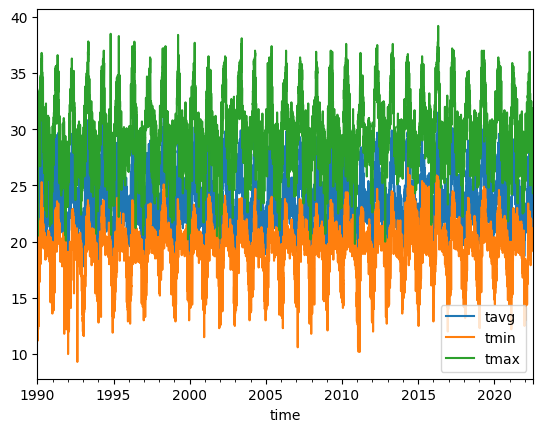

In [18]:
weather[["tavg","tmin","tmax"]].plot()

In [19]:
weather

,tavg,tmin,tmax,Humidity,WindSpeed,Precipitation
time,,,,,,
1990-01-01,22.9,19.1,28.4,25.017907,15.98,1.49
1990-01-02,21.7,19.1,26.5,23.603744,19.30,0.22
1990-01-03,21.0,16.4,26.5,29.143543,17.06,1.80
1990-01-04,20.8,16.4,27.4,28.182056,15.90,3.55
1990-01-05,20.4,14.2,26.1,27.300990,13.47,0.03
...,...,...,...,...,...,...
2022-07-21,23.7,20.5,30.8,81.463971,16.13,0.00
2022-07-22,23.2,21.1,27.9,82.627884,17.09,2.80
2022-07-23,23.1,20.9,26.7,71.036593,9.57,50.62


In [20]:
# List of target columns to shift
target_columns = {
    "target_temp": "tmax",
    "target_humidity": "Humidity",
    "target_Wind_Speed": "WindSpeed",
    "target_Precipitation": "Precipitation"
}

# Shift each column and add to the DataFrame if it exists
for target_col, original_col in target_columns.items():
    if original_col in weather.columns:
        weather[target_col] = weather.shift(-1)[original_col]
    else:
        weather[target_col] = None  # Set to None if the column is missing


In [21]:
weather

,tavg,tmin,tmax,Humidity,WindSpeed,Precipitation,target_temp,target_humidity,target_Wind_Speed,target_Precipitation
time,,,,,,,,,,
1990-01-01,22.9,19.1,28.4,25.017907,15.98,1.49,26.5,23.603744,19.30,0.22
1990-01-02,21.7,19.1,26.5,23.603744,19.30,0.22,26.5,29.143543,17.06,1.80
1990-01-03,21.0,16.4,26.5,29.143543,17.06,1.80,27.4,28.182056,15.90,3.55
1990-01-04,20.8,16.4,27.4,28.182056,15.90,3.55,26.1,27.300990,13.47,0.03
1990-01-05,20.4,14.2,26.1,27.300990,13.47,0.03,24.2,29.779124,17.92,0.03
...,...,...,...,...,...,...,...,...,...,...
2022-07-21,23.7,20.5,30.8,81.463971,16.13,0.00,27.9,82.627884,17.09,2.80
2022-07-22,23.2,21.1,27.9,82.627884,17.09,2.80,26.7,71.036593,9.57,50.62
2022-07-23,23.1,20.9,26.7,71.036593,9.57,50.62,26.7,62.610739,16.51,0.00


In [22]:
weather = weather.ffill()

In [23]:
weather

,tavg,tmin,tmax,Humidity,WindSpeed,Precipitation,target_temp,target_humidity,target_Wind_Speed,target_Precipitation
time,,,,,,,,,,
1990-01-01,22.9,19.1,28.4,25.017907,15.98,1.49,26.5,23.603744,19.30,0.22
1990-01-02,21.7,19.1,26.5,23.603744,19.30,0.22,26.5,29.143543,17.06,1.80
1990-01-03,21.0,16.4,26.5,29.143543,17.06,1.80,27.4,28.182056,15.90,3.55
1990-01-04,20.8,16.4,27.4,28.182056,15.90,3.55,26.1,27.300990,13.47,0.03
1990-01-05,20.4,14.2,26.1,27.300990,13.47,0.03,24.2,29.779124,17.92,0.03
...,...,...,...,...,...,...,...,...,...,...
2022-07-21,23.7,20.5,30.8,81.463971,16.13,0.00,27.9,82.627884,17.09,2.80
2022-07-22,23.2,21.1,27.9,82.627884,17.09,2.80,26.7,71.036593,9.57,50.62
2022-07-23,23.1,20.9,26.7,71.036593,9.57,50.62,26.7,62.610739,16.51,0.00


In [24]:
from sklearn.linear_model import Ridge

In [25]:
weather.corr()

,tavg,tmin,tmax,Humidity,WindSpeed,Precipitation,target_temp,target_humidity,target_Wind_Speed,target_Precipitation
tavg,1.000000,0.715096,0.870994,-0.295583,0.007511,-0.045118,0.839126,-0.294874,0.008685,-0.041309
tmin,0.715096,1.000000,0.455101,0.023107,0.004645,0.144963,0.433387,0.024779,0.009148,0.141362
tmax,0.870994,0.455101,1.000000,-0.432406,0.006648,-0.149748,0.900272,-0.433639,0.001562,-0.146329
Humidity,-0.295583,0.023107,-0.432406,1.000000,0.001946,0.368681,-0.430467,0.902336,0.004170,0.364553
WindSpeed,0.007511,0.004645,0.006648,0.001946,1.000000,-0.002471,0.006994,0.002605,-0.006321,-0.000076
Precipitation,-0.045118,0.144963,-0.149748,0.368681,-0.002471,1.000000,-0.153409,0.384591,0.000132,0.328746
target_temp,0.839126,0.433387,0.900272,-0.430467,0.006994,-0.153409,1.000000,-0.432463,0.006687,-0.149762
target_humidity,-0.294874,0.024779,-0.433639,0.902336,0.002605,0.384591,-0.432463,1.000000,0.001893,0.368650
target_Wind_Speed,0.008685,0.009148,0.001562,0.004170,-0.006321,0.000132,0.006687,0.001893,1.000000,-0.002459
target_Precipitation,-0.041309,0.141362,-0.146329,0.364553,-0.000076,0.328746,-0.149762,0.368650,-0.002459,1.000000


In [26]:
from sklearn.linear_model import Ridge 

rr= Ridge(alpha=.1)

In [27]:
predictors1 = ["tavg", "tmin", "tmax"]
predictors2 = ["Humidity"]
predictors3 = ["WindSpeed"]
predictors4 = ["Precipitation"]

In [28]:
# Store them in a list
predictors = [predictors1, predictors2, predictors3, predictors4]

# Print each list
for predictor_list in predictors:
    print(predictor_list)

['tavg', 'tmin', 'tmax']
['Humidity']
['WindSpeed']
['Precipitation']


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

def train_lstm_model(weather, predictors, target="target", sequence_length=30, epochs=2, batch_size=32):
    """
    Trains an LSTM model for weather prediction.
    Parameters:
    - weather: DataFrame with weather data including predictors and target.
    - predictors: List of column names to be used as input features for the model.
    - target: Target column name in the weather DataFrame (default: "target").
    - sequence_length: Number of previous days to consider for predicting the next day's target.
    - epochs: Number of epochs to train the model (default: 50).
    - batch_size: Size of each training batch (default: 32).

    Returns:
    - model: Trained LSTM model.
    - predictions: Predicted values for the test set.
    - y_test_actual: Actual values for the test set.
    """
    
    # Scaling the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    weather_scaled = scaler.fit_transform(weather[predictors + [target]])
    weather_scaled = pd.DataFrame(weather_scaled, columns=predictors + [target])
    
    # Preparing sequences for LSTM (X: input features, y: target)
    X, y = [], []
    for i in range(sequence_length, len(weather_scaled)):
        X.append(weather_scaled.iloc[i-sequence_length:i][predictors].values)
        y.append(weather_scaled.iloc[i][target])
    X, y = np.array(X), np.array(y)
    
    # Splitting the data into training and testing sets (80% train, 20% test)
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Defining the LSTM model architecture
    model = Sequential([
        LSTM(50, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)  # Output layer (one neuron for regression)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")
    
    # Training the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)
    
    # Generating predictions for the test set
    predictions = model.predict(X_test)
    
    # Inverse scaling for predictions and actual test values
    predictions = scaler.inverse_transform(np.concatenate([np.zeros((predictions.shape[0], len(predictors))), predictions], axis=1))[:, -1]
    y_test_actual = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], len(predictors))), y_test.reshape(-1, 1)], axis=1))[:, -1]
    
    # Calculating the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    print(f"LSTM Model Test RMSE: {rmse}")
    
    return model, predictions, y_test_actual
def train_lstm_model_predictors1(weather, target="target_temp"):
    predictors1 = ["tavg", "tmin", "tmax"]
    return train_lstm_model(weather, predictors1, target=target)

def train_lstm_model_predictors2(weather, target="target_humidity"):
    predictors2 = ["Humidity"]
    return train_lstm_model(weather, predictors2, target=target)

def train_lstm_model_predictors3(weather, target="target_Wind_Speed"):
    predictors3 = ["WindSpeed"]
    return train_lstm_model(weather, predictors3, target=target)

def train_lstm_model_predictors4(weather, target="target_Precipitation"):
    predictors4 = ["Precipitation"]
    return train_lstm_model(weather, predictors4, target=target)


In [29]:
print(weather.columns)

Index(['tavg', 'tmin', 'tmax', 'Humidity', 'WindSpeed', 'Precipitation',
       'target_temp', 'target_humidity', 'target_Wind_Speed',
       'target_Precipitation'],
      dtype='object')


In [31]:
# Example of calling the functions with specific target columns
model1, predictions1, y_test_actual1 = train_lstm_model_predictors1(weather, target="target_temp")
model2, predictions2, y_test_actual2 = train_lstm_model_predictors2(weather, target="target_humidity")
model3, predictions3, y_test_actual3 = train_lstm_model_predictors3(weather, target="target_Wind_Speed")
model4, predictions4, y_test_actual4 = train_lstm_model_predictors4(weather, target="target_Precipitation")



Epoch 1/2

297/297 [==============================] - 3s 5ms/step - loss: 0.0190 - val_loss: 0.0056
Epoch 2/2
75/75 [==============================] - 0s 2ms/step
LSTM Model Test RMSE: 1.4103016218371915
Epoch 1/2
297/297 [==============================] - 2s 5ms/step - loss: 0.0293 - val_loss: 0.0163
Epoch 2/2
75/75 [==============================] - 0s 1ms/step
LSTM Model Test RMSE: 9.763581416140482
Epoch 1/2
297/297 [==============================] - 2s 5ms/step - loss: 0.0958 - val_loss: 0.0844
Epoch 2/2
75/75 [==============================] - 0s 2ms/step
LSTM Model Test RMSE: 5.807334146920004
Epoch 1/2
297/297 [==============================] - 2s 5ms/step - loss: 0.0116 - val_loss: 0.0099
Epoch 2/2
75/75 [==============================] - 0s 2ms/step
LSTM Model Test RMSE: 8.629523154543751


In [30]:
def backtest(weather, model, predictors, target="target", start=3650, step=90):
    """
    Backtest the model for weather prediction using different sets of predictors.

    Parameters:
    - weather: DataFrame with weather data including predictors and target.
    - model: The model to be used for prediction (e.g., a trained LSTM model).
    - predictors: List of column names to be used as input features for the model.
    - target: The column name of the target variable (default: "target").
    - start: Starting index for backtesting (default: 3650).
    - step: Number of rows to predict at each step (default: 90).

    Returns:
    - A DataFrame containing actual vs predicted values and the absolute difference.
    """
    all_predictions = []

    # Loop through the data for backtesting
    for i in range(start, weather.shape[0], step):
        # Split the data into training and testing sets
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i + step), :]

        # Fit the model with the current training data
        model.fit(train[predictors], train[target])

        # Generate predictions
        preds = model.predict(test[predictors])

        # Convert predictions to a Series with the same index as the test set
        preds = pd.Series(preds, index=test.index)

        # Combine actual and predicted values into one DataFrame
        combined = pd.concat([test[target], preds], axis=1)
        combined.columns = ["actual", "prediction"]

        # Calculate the absolute difference between actual and predicted values
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        # Append the results for this step to the list
        all_predictions.append(combined)

    # Return all predictions concatenated into one DataFrame
    return pd.concat(all_predictions)


In [31]:
# Define predictors and their corresponding targets
predictors1 = ["tavg", "tmin", "tmax"]
target1 = "target_temp"

predictors2 = ["Humidity"]
target2 = "target_humidity"

predictors3 = ["WindSpeed"]
target3 = "target_Wind_Speed"

predictors4 = ["Precipitation"]
target4 = "target_Precipitation"

# Import Ridge regression model
from sklearn.linear_model import Ridge

# Define your model as Ridge with an optional alpha parameter for regularization strength
model = Ridge(alpha=1.0)  # You can adjust alpha based on your needs

# Call backtest function for each set of predictors
predictions1 = backtest(weather, model, predictors1, target=target1)
predictions2 = backtest(weather, model, predictors2, target=target2)
predictions3 = backtest(weather, model, predictors3, target=target3)
predictions4 = backtest(weather, model, predictors4, target=target4)

# Print the predictions for each set
print("Predictions for predictors1 (Temperature):")
print(predictions1)

print("Predictions for predictors2 (Humidity):")
print(predictions2)

print("Predictions for predictors3 (Wind Speed):")
print(predictions3)

print("Predictions for predictors4 (Precipitation):")
print(predictions4)


Predictions for predictors1 (Temperature):
            actual  prediction      diff
time                                    
1999-12-30    24.7   25.613350  0.913350
1999-12-31    26.1   24.927241  1.172759
2000-01-01    26.1   26.045813  0.054187
2000-01-02    25.8   26.094297  0.294297
2000-01-03    25.8   26.217265  0.417265
...            ...         ...       ...
2022-07-21    27.9   30.200623  2.300623
2022-07-22    26.7   28.073259  1.373259
2022-07-23    26.7   27.322241  0.622241
2022-07-24    28.5   27.316678  1.183322
2022-07-25    28.5   29.052170  0.552170

[8244 rows x 3 columns]
Predictions for predictors2 (Humidity):
               actual  prediction       diff
time                                        
1999-12-30  34.512489   30.256077   4.256411
1999-12-31  34.094001   35.016427   0.922426
2000-01-01  27.105441   34.638413   7.532972
2000-01-02  33.739424   28.325754   5.413670
2000-01-03  20.654730   34.318130  13.663400
...               ...         ...        ...

In [32]:
# Example: Calculate the average absolute error for each backtest result
print("Average absolute error for predictors1:", predictions1["diff"].mean())
print("Average absolute error for predictors2:", predictions2["diff"].mean())
print("Average absolute error for predictors3:", predictions3["diff"].mean())
print("Average absolute error for predictors4:", predictions4["diff"].mean())


Average absolute error for predictors1: 0.8546400238505063
Average absolute error for predictors2: 7.549793927564199
Average absolute error for predictors3: 4.983374276902363
Average absolute error for predictors4: 6.089710707177982


In [33]:
predictors

[['tavg', 'tmin', 'tmax'], ['Humidity'], ['WindSpeed'], ['Precipitation']]

In [34]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"

    # Compute rolling mean
    weather[label] = weather[col].rolling(horizon).mean()
    
    # Compute percentage difference from the original column
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    
    return weather

# Define the columns for which to compute rolling averages
columns_to_rolling = ["tmax", "tmin", "Humidity", "WindSpeed", "Precipitation"]

# Define rolling horizons
rolling_horizons = [3, 14]

# Loop through each horizon and column to compute the rolling values
for horizon in rolling_horizons:
    for col in columns_to_rolling:
        weather = compute_rolling(weather, horizon, col)

# Now the `weather` DataFrame will have the rolling averages and percentage differences for each column and horizon.


In [35]:
weather

,tavg,tmin,tmax,Humidity,WindSpeed,Precipitation,target_temp,target_humidity,target_Wind_Speed,target_Precipitation,...,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_Humidity,rolling_14_Humidity_pct,rolling_14_WindSpeed,rolling_14_WindSpeed_pct,rolling_14_Precipitation,rolling_14_Precipitation_pct
time,,,,,,,,,,,,,,,,,,,,,
1990-01-01,22.9,19.1,28.4,25.017907,15.98,1.49,26.5,23.603744,19.30,0.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,21.7,19.1,26.5,23.603744,19.30,0.22,26.5,29.143543,17.06,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,21.0,16.4,26.5,29.143543,17.06,1.80,27.4,28.182056,15.90,3.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,20.8,16.4,27.4,28.182056,15.90,3.55,26.1,27.300990,13.47,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,20.4,14.2,26.1,27.300990,13.47,0.03,24.2,29.779124,17.92,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,23.7,20.5,30.8,81.463971,16.13,0.00,27.9,82.627884,17.09,2.80,...,26.992857,0.141043,19.985714,0.025733,70.713371,0.152031,14.767143,0.092290,7.782143,-1.000000
2022-07-22,23.2,21.1,27.9,82.627884,17.09,2.80,26.7,71.036593,9.57,50.62,...,27.164286,0.027084,20.085714,0.050498,71.348753,0.158084,15.283571,0.118194,7.546429,-0.628964
2022-07-23,23.1,20.9,26.7,71.036593,9.57,50.62,26.7,62.610739,16.51,0.00,...,27.250000,-0.020183,20.164286,0.036486,70.796689,0.003389,14.780714,-0.352535,10.884286,3.650742


In [36]:
weather = weather.iloc[14:,:]

In [37]:
weather


,tavg,tmin,tmax,Humidity,WindSpeed,Precipitation,target_temp,target_humidity,target_Wind_Speed,target_Precipitation,...,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_Humidity,rolling_14_Humidity_pct,rolling_14_WindSpeed,rolling_14_WindSpeed_pct,rolling_14_Precipitation,rolling_14_Precipitation_pct
time,,,,,,,,,,,,,,,,,,,,,
1990-01-15,21.0,11.5,30.3,20.765100,6.42,0.00,29.7,20.900939,6.74,0.00,...,26.614286,0.138486,15.057143,-0.236243,27.531589,-0.245772,17.134286,-0.625313,0.992143,-1.000000
1990-01-16,22.1,12.6,29.7,20.900939,6.74,0.00,29.0,25.443663,5.40,0.00,...,26.842857,0.106440,14.592857,-0.136564,27.338532,-0.235477,16.237143,-0.584902,0.976429,-1.000000
1990-01-17,23.8,12.6,29.0,25.443663,5.40,0.00,29.0,24.255597,21.65,1.13,...,27.021429,0.073222,14.321429,-0.120200,27.074255,-0.060227,15.404286,-0.649448,0.847857,-1.000000
1990-01-18,20.1,13.8,29.0,24.255597,21.65,1.13,30.7,27.333996,20.56,0.00,...,27.135714,0.068702,14.135714,-0.023749,26.793793,-0.094731,15.815000,0.368954,0.675000,0.674074
1990-01-19,21.3,12.2,30.7,27.333996,20.56,0.00,30.7,29.916643,22.40,0.00,...,27.464286,0.117815,13.992857,-0.128127,26.796151,0.020072,16.321429,0.259694,0.672857,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,23.7,20.5,30.8,81.463971,16.13,0.00,27.9,82.627884,17.09,2.80,...,26.992857,0.141043,19.985714,0.025733,70.713371,0.152031,14.767143,0.092290,7.782143,-1.000000
2022-07-22,23.2,21.1,27.9,82.627884,17.09,2.80,26.7,71.036593,9.57,50.62,...,27.164286,0.027084,20.085714,0.050498,71.348753,0.158084,15.283571,0.118194,7.546429,-0.628964
2022-07-23,23.1,20.9,26.7,71.036593,9.57,50.62,26.7,62.610739,16.51,0.00,...,27.250000,-0.020183,20.164286,0.036486,70.796689,0.003389,14.780714,-0.352535,10.884286,3.650742


In [38]:
weather = weather.fillna(0)

In [39]:
def expand_mean(df):
    return df.expanding(1).mean()

# List of columns to compute expanding mean for
columns_to_avg = ["tmax", "tmin", "Humidity", "WindSpeed", "Precipitation"]

# Compute expanding mean for each column based on month and day_of_year
for col in columns_to_avg:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

# Now `weather` DataFrame will have the expanding means for each of the columns for both month and day_of_year


In [40]:
weather

,tavg,tmin,tmax,Humidity,WindSpeed,Precipitation,target_temp,target_humidity,target_Wind_Speed,target_Precipitation,...,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_Humidity,day_avg_Humidity,month_avg_WindSpeed,day_avg_WindSpeed,month_avg_Precipitation,day_avg_Precipitation
time,,,,,,,,,,,,,,,,,,,,,
1990-01-15,21.0,11.5,30.3,20.765100,6.42,0.00,29.7,20.900939,6.74,0.00,...,30.300000,30.300000,11.500000,11.500000,20.765100,20.765100,6.420000,6.420000,0.000000,0.000000
1990-01-16,22.1,12.6,29.7,20.900939,6.74,0.00,29.0,25.443663,5.40,0.00,...,30.000000,29.700000,12.050000,12.600000,20.833019,20.900939,6.580000,6.740000,0.000000,0.000000
1990-01-17,23.8,12.6,29.0,25.443663,5.40,0.00,29.0,24.255597,21.65,1.13,...,29.666667,29.000000,12.233333,12.600000,22.369901,25.443663,6.186667,5.400000,0.000000,0.000000
1990-01-18,20.1,13.8,29.0,24.255597,21.65,1.13,30.7,27.333996,20.56,0.00,...,29.500000,29.000000,12.625000,13.800000,22.841325,24.255597,10.052500,21.650000,0.282500,1.130000
1990-01-19,21.3,12.2,30.7,27.333996,20.56,0.00,30.7,29.916643,22.40,0.00,...,29.740000,30.700000,12.540000,12.200000,23.739859,27.333996,12.154000,20.560000,0.226000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,23.7,20.5,30.8,81.463971,16.13,0.00,27.9,82.627884,17.09,2.80,...,28.383613,28.572727,20.189240,20.387879,75.320797,76.530903,15.196654,14.884545,13.534798,15.468788
2022-07-22,23.2,21.1,27.9,82.627884,17.09,2.80,26.7,71.036593,9.57,50.62,...,28.383136,28.233333,20.190138,20.245455,75.328003,75.239908,15.198521,15.686970,13.524211,14.148788
2022-07-23,23.1,20.9,26.7,71.036593,9.57,50.62,26.7,62.610739,16.51,0.00,...,28.381478,28.130303,20.190837,20.072727,75.323775,78.203184,15.192975,14.516364,13.560759,16.417879


In [41]:
print(weather.columns)

Index(['tavg', 'tmin', 'tmax', 'Humidity', 'WindSpeed', 'Precipitation',
       'target_temp', 'target_humidity', 'target_Wind_Speed',
       'target_Precipitation', 'rolling_3_tmax', 'rolling_3_tmax_pct',
       'rolling_3_tmin', 'rolling_3_tmin_pct', 'rolling_3_Humidity',
       'rolling_3_Humidity_pct', 'rolling_3_WindSpeed',
       'rolling_3_WindSpeed_pct', 'rolling_3_Precipitation',
       'rolling_3_Precipitation_pct', 'rolling_14_tmax', 'rolling_14_tmax_pct',
       'rolling_14_tmin', 'rolling_14_tmin_pct', 'rolling_14_Humidity',
       'rolling_14_Humidity_pct', 'rolling_14_WindSpeed',
       'rolling_14_WindSpeed_pct', 'rolling_14_Precipitation',
       'rolling_14_Precipitation_pct', 'month_avg_tmax', 'day_avg_tmax',
       'month_avg_tmin', 'day_avg_tmin', 'month_avg_Humidity',
       'day_avg_Humidity', 'month_avg_WindSpeed', 'day_avg_WindSpeed',
       'month_avg_Precipitation', 'day_avg_Precipitation'],
      dtype='object')


In [42]:
predictors1 = ["tavg", "tmin", "tmax", "rolling_14_tmax", "rolling_14_tmax_pct", "rolling_14_tmin", "rolling_14_tmin_pct", "rolling_3_tmax", "rolling_3_tmax_pct", "rolling_3_tmin", "rolling_3_tmin_pct", "month_avg_tmax", "day_avg_tmax",
       "month_avg_tmin", "day_avg_tmin"]
predictors2 = ["Humidity", "rolling_3_Humidity", "rolling_3_Humidity_pct", "rolling_14_Humidity", "rolling_14_Humidity_pct", "month_avg_Humidity",
       "day_avg_Humidity"] 
predictors3 = ["WindSpeed", "rolling_3_WindSpeed", "rolling_3_WindSpeed_pct", "rolling_14_WindSpeed", "rolling_14_WindSpeed_pct", "month_avg_WindSpeed", "day_avg_WindSpeed"]
predictors4 = ["Precipitation", "rolling_3_Precipitation", "rolling_3_Precipitation_pct", "rolling_14_Precipitation", "rolling_14_Precipitation_pct","month_avg_Precipitation", "day_avg_Precipitation"]

In [43]:
# Call backtest function for each set of predictors
predictions1 = backtest(weather, model, predictors1, target=target1)
predictions2 = backtest(weather, model, predictors2, target=target2)
predictions3 = backtest(weather, model, predictors3, target=target3)
predictions4 = backtest(weather, model, predictors4, target=target4)

# Print the predictions for each set
print("Predictions for predictors1:")
print(predictions1)

print("Predictions for predictors2:")
print(predictions2)

print("Predictions for predictors3:")
print(predictions3)

print("Predictions for predictors4:")
print(predictions4)

# Optionally, you can compare RMSE or plot the results

Predictions for predictors1:
            actual  prediction      diff
time                                    
2000-01-13    29.4   28.545491  0.854509
2000-01-14    30.1   28.702170  1.397830
2000-01-15    29.6   29.564204  0.035796
2000-01-16    29.6   29.126079  0.473921
2000-01-17    29.1   29.264513  0.164513
...            ...         ...       ...
2022-07-21    27.9   29.568822  1.668822
2022-07-22    26.7   27.965402  1.265402
2022-07-23    26.7   27.329305  0.629305
2022-07-24    28.5   27.233803  1.266197
2022-07-25    28.5   28.630052  0.130052

[8230 rows x 3 columns]
Predictions for predictors2:
               actual  prediction       diff
time                                        
2000-01-13  27.116319   30.250323   3.134004
2000-01-14  36.808159   30.281755   6.526404
2000-01-15  20.456534   29.899339   9.442805
2000-01-16  32.657594   30.047583   2.610011
2000-01-17  25.583176   29.758332   4.175157
...               ...         ...        ...
2022-07-21  82.627884   

In [44]:
# Example: Calculate the average absolute error for each backtest result
print("Average absolute error for predictors1:", predictions1["diff"].mean())
print("Average absolute error for predictors2:", predictions2["diff"].mean())
print("Average absolute error for predictors3:", predictions3["diff"].mean())
print("Average absolute error for predictors4:", predictions4["diff"].mean())


Average absolute error for predictors1: 0.8355598671630153
Average absolute error for predictors2: 5.896088709650243
Average absolute error for predictors3: 4.986758341482361
Average absolute error for predictors4: 4.820608922580671


In [45]:
predictions1["diff"].round().value_counts().sort_index()
predictions2["diff"].round().value_counts().sort_index()
predictions3["diff"].round().value_counts().sort_index()
predictions4["diff"].round().value_counts().sort_index()

diff
0.0     1055
1.0     3655
2.0      738
3.0      298
4.0      172
5.0      125
6.0      104
7.0      102
8.0      128
9.0      102
10.0      99
11.0      89
12.0     190
13.0     578
14.0     254
15.0      57
16.0      31
17.0      35
18.0      34
19.0      26
20.0      34
21.0      27
22.0      21
23.0      29
24.0      29
25.0      19
26.0      16
27.0      25
28.0      17
29.0      13
30.0      15
31.0      13
32.0      12
33.0       9
34.0       6
35.0      10
36.0       7
37.0       5
38.0       4
39.0       3
40.0       6
41.0       4
42.0       4
43.0       3
44.0       3
45.0       4
46.0       3
47.0       3
48.0       2
49.0       2
50.0       3
51.0       1
53.0       1
54.0       1
55.0       2
58.0       1
65.0       1
Name: count, dtype: int64

<Axes: xlabel='diff'>

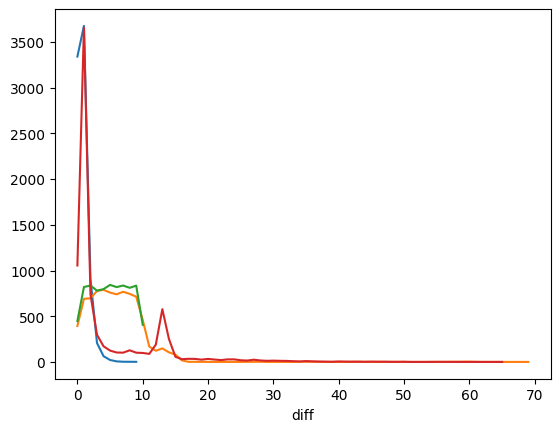

In [46]:
predictions1["diff"].round().value_counts().sort_index().plot()
predictions2["diff"].round().value_counts().sort_index().plot()
predictions3["diff"].round().value_counts().sort_index().plot()
predictions4["diff"].round().value_counts().sort_index().plot()

In [62]:
# Define predictors and their corresponding targets
predictors1 = ["tavg", "tmin", "tmax", "rolling_14_tmax", "rolling_14_tmax_pct", "rolling_14_tmin", "rolling_14_tmin_pct", "rolling_3_tmax", "rolling_3_tmax_pct", "rolling_3_tmin", "rolling_3_tmin_pct", "month_avg_tmax", "day_avg_tmax",
       "month_avg_tmin", "day_avg_tmin"]
target1 = "target_temp"

predictors2 = ["Humidity", "rolling_3_Humidity", "rolling_3_Humidity_pct", "rolling_14_Humidity", "rolling_14_Humidity_pct", "month_avg_Humidity", "day_avg_Humidity"]
target2 = "target_humidity"

predictors3 = ["WindSpeed", "rolling_3_WindSpeed", "rolling_3_WindSpeed_pct", "rolling_14_WindSpeed", "rolling_14_WindSpeed_pct", "month_avg_WindSpeed", "day_avg_WindSpeed"]
target3 = "target_Wind_Speed"

predictors4 = ["Precipitation", "rolling_3_Precipitation", "rolling_3_Precipitation_pct", "rolling_14_Precipitation", "rolling_14_Precipitation_pct", "month_avg_Precipitation", "day_avg_Precipitation"]
target4 = "target_Precipitation"

# Import Ridge Regression model
from sklearn.linear_model import Ridge

# Train Ridge Regression model for each feature set independently
model_temp = Ridge()
model_humidity = Ridge()
model_windspeed = Ridge()
model_precipitation = Ridge()

# Assuming 'weather' is your DataFrame and you've already defined it
# Train model for temperature
X_temp = weather[predictors1]
y_temp = weather[target1]
model_temp.fit(X_temp, y_temp)

# Train model for humidity
X_humidity = weather[predictors2]
y_humidity = weather[target2]
model_humidity.fit(X_humidity, y_humidity)

# Train model for wind speed
X_windspeed = weather[predictors3]
y_windspeed = weather[target3]
model_windspeed.fit(X_windspeed, y_windspeed)

# Train model for precipitation
X_precipitation = weather[predictors4]
y_precipitation = weather[target4]
model_precipitation.fit(X_precipitation, y_precipitation)

# Now define the prediction functions for each target variable
import numpy as np

def predict_temperature_until_date(model, weather, predictors, date):
    # Convert the input date to a datetime object
    date = pd.to_datetime(date)
    
    # Check if the target date is within the existing dataset
    if date in weather.index:
        # If the date is available, return the actual temperature
        actual_temp = weather.loc[date, "target_temp"]
        print(f"Actual temperature on {date.date()}: {actual_temp}°C")
        return actual_temp
    
    # Start from the last available date in the dataset
    current_date = weather.index[-1]
    predicted_temperatures = []
    
    # Predict until reaching the specified date
    while current_date < date:
        # Prepare data for prediction based on current predictors
        data_for_prediction = weather.loc[current_date, predictors].to_frame().T
        
        # Make the temperature prediction
        predicted_temp = model.predict(data_for_prediction)[0]
        predicted_temperatures.append((current_date, predicted_temp))  # Store date and predicted temp
        
        # Display the prediction for this date
        print(f"Predicted temperature on {current_date.date()}: {predicted_temp}°C")
        
        # Create a new row to store the predicted temperature and updated predictors
        new_row = pd.Series(predicted_temp, index=["target"])
        
        # Update predictors by adding simulated changes (e.g., adding random noise for demonstration)
        for predictor in predictors:
            new_row[predictor] = weather.loc[current_date, predictor] + np.random.normal(0, 0.05)
        
        # Move to the next day
        current_date += pd.Timedelta(days=1)
        
        # Convert the new row to a DataFrame and set its index to the new date
        new_row_df = new_row.to_frame().T
        new_row_df.index = [current_date]
        
        # Concatenate the new row to the weather DataFrame
        weather = pd.concat([weather, new_row_df])
    
    # Return the final predicted temperature for the target date
    return predicted_temperatures[-1][1]  # Return only the last predicted temperature



def predict_humidity_until_date(model, weather, predictors, date):
    # Convert the input date to a datetime object
    date = pd.to_datetime(date)
    
    # Check if the target date is within the existing dataset
    if date in weather.index:
        actual_humidity = weather.loc[date, "target_humidity"]
        print(f"Actual humidity on {date.date()}: {actual_humidity}%")
        return actual_humidity
    
    current_date = weather.index[-1]
    predicted_humidities = []
    
    # Predict until reaching the specified date
    while current_date < date:
        data_for_prediction = weather.loc[current_date, predictors].to_frame().T
        predicted_humidity = model.predict(data_for_prediction)[0]
        predicted_humidities.append((current_date, predicted_humidity))
        
        print(f"Predicted humidity on {current_date.date()}: {predicted_humidity}%")
        
        new_row = pd.Series(predicted_humidity, index=["target_humidity"])
        for predictor in predictors:
            new_row[predictor] = weather.loc[current_date, predictor] + np.random.normal(0, 0.05)
        
        current_date += pd.Timedelta(days=1)
        
        new_row_df = new_row.to_frame().T
        new_row_df.index = [current_date]
        weather = pd.concat([weather, new_row_df])
    
    return predicted_humidities[-1][1]



def predict_windspeed_until_date(model, weather, predictors, date):
    date = pd.to_datetime(date)
    
    if date in weather.index:
        actual_windspeed = weather.loc[date, "target_Wind_Speed"]
        print(f"Actual wind speed on {date.date()}: {actual_windspeed} m/s")
        return actual_windspeed
    
    current_date = weather.index[-1]
    predicted_windspeeds = []
    
    while current_date < date:
        data_for_prediction = weather.loc[current_date, predictors].to_frame().T
        predicted_windspeed = model.predict(data_for_prediction)[0]
        predicted_windspeeds.append((current_date, predicted_windspeed))
        
        print(f"Predicted wind speed on {current_date.date()}: {predicted_windspeed} m/s")
        
        new_row = pd.Series(predicted_windspeed, index=["target_windspeed"])
        for predictor in predictors:
            new_row[predictor] = weather.loc[current_date, predictor] + np.random.normal(0, 0.05)
        
        current_date += pd.Timedelta(days=1)
        
        new_row_df = new_row.to_frame().T
        new_row_df.index = [current_date]
        weather = pd.concat([weather, new_row_df])
    
    return predicted_windspeeds[-1][1]



def predict_precipitation_until_date(model, weather, predictors, date):
    date = pd.to_datetime(date)
    
    if date in weather.index:
        actual_precipitation = weather.loc[date, "target_Precipitation"]
        print(f"Actual precipitation on {date.date()}: {actual_precipitation} mm")
        return actual_precipitation
    
    current_date = weather.index[-1]
    predicted_precipitations = []
    
    while current_date < date:
        data_for_prediction = weather.loc[current_date, predictors].to_frame().T
        predicted_precipitation = model.predict(data_for_prediction)[0]
        predicted_precipitations.append((current_date, predicted_precipitation))
        
        print(f"Predicted precipitation on {current_date.date()}: {predicted_precipitation} mm")
        
        new_row = pd.Series(predicted_precipitation, index=["target_precipitation"])
        for predictor in predictors:
            new_row[predictor] = weather.loc[current_date, predictor] + np.random.normal(0, 0.05)
        
        current_date += pd.Timedelta(days=1)
        
        new_row_df = new_row.to_frame().T
        new_row_df.index = [current_date]
        weather = pd.concat([weather, new_row_df])
    
    return predicted_precipitations[-1][1]



# Make the prediction and print the final temperature directly
temperature_prediction = predict_temperature_until_date(model_temp, weather, predictors1, date="2022-08/-10")
print(f"Predicted temperature on 2022-08-10: {temperature_prediction}°C")

humidity_prediction = predict_humidity_until_date(model_humidity, weather, predictors2, date="2022-08-10")
print(f"Predicted humidity on 2022-08-01: {humidity_prediction}%")

windspeed_prediction = predict_windspeed_until_date(model_windspeed, weather, predictors3, date="2022-08-10")
print(f"Predicted wind speed on 2022-08-01: {windspeed_prediction} m/s")

precipitation_prediction = predict_precipitation_until_date(model_precipitation, weather, predictors4, date="2022-08-10")
print(f"Predicted precipitation on 2022-08-01: {precipitation_prediction} mm")


Predicted temperature on 2022-07-25: 28.62905657814512°C
Predicted temperature on 2022-07-26: 28.649645092371397°C
Predicted temperature on 2022-07-27: 28.712135344106198°C
Predicted temperature on 2022-07-28: 28.736050568037427°C
Predicted temperature on 2022-07-29: 28.740447267722203°C
Predicted temperature on 2022-07-30: 28.858610486601364°C
Predicted temperature on 2022-07-31: 28.902812958161803°C
Predicted temperature on 2022-08-01: 29.08443061186647°C
Predicted temperature on 2022-08-02: 29.085965789613343°C
Predicted temperature on 2022-08-03: 29.185685398692733°C
Predicted temperature on 2022-08-04: 29.13533558709456°C
Predicted temperature on 2022-08-05: 29.144849638249465°C
Predicted temperature on 2022-08-06: 29.04006998629605°C
Predicted temperature on 2022-08-07: 29.011238502494827°C
Predicted temperature on 2022-08-08: 29.27153402976966°C
Predicted temperature on 2022-08-09: 29.413895468517943°C
Predicted temperature on 2022-08-10: 29.413895468517943°C
Predicted humidity 